In [3]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

## Platform used - google colab

Names and PRN for all group members:
- Name: Shubham Shaha, Prathmesh Kale, Ustav
- PRN:  240340128031, 240340128020, 240340128036
- Date: 02/06/2024

# Image Processing with Neural Network
## A07: Group Assignment


##  Convolutional Neural Network (CNN)

- Flowers Dataset


In [4]:
###-----------------
### Import Libraries
###-----------------

import os
import datetime
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# verify if the directory exists
def fn_dir_exists(_dir):
    '''
    Args:
    	_dir: path if a directory
     '''

    res = os.path.exists(_dir)

    fn_log_event ('-- Directory "{}" exist : {}'.format(_dir, res), 'debug')

    if not res:

        fn_log_event ('-- Directory "{}" does not exists.'.format(_dir), 'debug')

        sys.exit('-- Directory "{}" does not exists.'.format(_dir))

    return res



def fn_file_exists(_file):
    '''
        verify if the file exists
    '''
    res = os.path.exists(_file)

    fn_log_event ('-- File "{}" exist : {}'.format(_file, res), 'debug')

    if not res:

        fn_log_event ('-- File "{}" does not exists.'.format(_file), 'debug')

        sys.exit('-- File "{}" does not exists.'.format(_file))

    return res


###-----------------------------
### Verify or create a directory
###-----------------------------
def fn_verify_dir(_path : str):
    '''
    Arg:
        path: path to verify the directory
    returns:
        create dir if it does not exists
    '''
    if os.path.exists(_path): # check if the path exists. Maybe a file or a folder

        print(_path, ' exists') # advised the user

    else:

        os.makedirs(_path) # create the path

        print("Created folder : ", _path)

###------------------------------------------------
### Plot Loss Curve using Tensorflow history object
###------------------------------------------------
def fn_plot_tf_hist(hist_df):

    '''
    Args:
        hist_df: a dataframe with following ccolumns
            column 0: loss
            column 1: accuracy
            column 2: val_loss
            column 3: val_accuracy
            While plotting columns are accessed by index
            so that even if the column names are different it will not throw exceptions.
    '''

    fig, axes = plt.subplots(1,2 , figsize = (15,6))

    # properties  matplotlib.patch.Patch
    props = dict(boxstyle='round', facecolor='aqua', alpha=0.4)
    facecolor = 'cyan'
    fontsize=12
    CMAP = plt.cm.coolwarm

    # Get columns by index to eliminate any column naming error
    y1 = hist_df.columns[0]
    y2 = hist_df.columns[1]
    y3 = hist_df.columns[2]
    y4 = hist_df.columns[3]

    # Where was min loss
    best = hist_df[hist_df[y3] == hist_df[y3].min()]

    ax = axes[0]

    hist_df.plot(y = [y1,y3], ax = ax, colormap=CMAP)


    # little beautification
    txtFmt = "Loss: \n  train: {:6.4f}\n   test: {:6.4f}"
    txtstr = txtFmt.format(hist_df.iloc[-1][y1],
                           hist_df.iloc[-1][y3]) #text to plot

    # place a text box in upper middle in axes coords
    ax.text(0.3, 0.95, txtstr, transform=ax.transAxes, fontsize=fontsize,
            verticalalignment='top', bbox=props)

    # calculate offset for arroe
    y_min = min(hist_df[y1].min(), hist_df[y3].min())
    y_max = max(hist_df[y1].max(), hist_df[y3].max())
    offset = (y_max-y_min)/10.0

    # Mark arrow at lowest
    ax.annotate(f'Min: {best[y3].to_numpy()[0]:6.4f}', # text to print
                xy=(best.index.to_numpy(), best[y3].to_numpy()[0]), # Arrow start
                xytext=(best.index.to_numpy(), best[y3].to_numpy()[0] + offset), # location of text
                fontsize=fontsize, va='bottom', ha='right',bbox=props, # beautification of text
                arrowprops=dict(facecolor=facecolor, shrink=0.05)) # arrow

    # Draw vertical line at best value
    ax.axvline(x = best.index.to_numpy(), color = 'green', linestyle='-.', lw = 3);

    ax.set_xlabel("Epochs")
    ax.set_ylabel(y1.capitalize())
    ax.set_title('Errors')
    ax.grid();
    ax.legend(loc = 'upper left') # model legend to upper left

    ax = axes[1]

    hist_df.plot( y = [y2, y4], ax = ax, colormap=CMAP)

    # little beautification
    txtFmt = "Accuracy: \n  train: {:6.4f}\n  test:  {:6.4f}"
    txtstr = txtFmt.format(hist_df.iloc[-1][y2],
                           hist_df.iloc[-1][y4]) #text to plot

    # place a text box in upper middle in axes coords
    ax.text(0.3, 0.2, txtstr, transform=ax.transAxes, fontsize=fontsize,
            verticalalignment='top', bbox=props)

    # calculate offset for arroe
    y_min = min(hist_df[y2].min(), hist_df[y4].min())
    y_max = max(hist_df[y2].max(), hist_df[y4].max())
    offset = (y_max-y_min)/10.0

    # Mark arrow at lowest
    ax.annotate(f'Best: {best[y4].to_numpy()[0]:6.4f}', # text to print
                xy=(best.index.to_numpy(), best[y4].to_numpy()[0]), # Arrow start
                xytext=(best.index.to_numpy(), best[y4].to_numpy()[0]-offset), # location of text
                fontsize=fontsize, va='bottom', ha='right',bbox=props, # beautification of text
                arrowprops=dict(facecolor=facecolor, shrink=0.05)) # arrow


    # Draw vertical line at best value
    ax.axvline(x = best.index.to_numpy(), color = 'green', linestyle='-.', lw = 3);

    ax.set_xlabel("Epochs")
    ax.set_ylabel(y2.capitalize())
    ax.grid()
    ax.legend(loc = 'lower left')

    plt.tight_layout()



###------------------------------
### Plot Loss Curve using pytorch
###------------------------------
def fn_plot_torch_hist(hist_df):

    # instantiate figure
    fig, axes = plt.subplots(1,2 , figsize = (15,6))

    # properties  matplotlib.patch.Patch
    props = dict(boxstyle='round', facecolor='cyan', alpha=0.5)

    # columns
    x = hist_df.columns[0]
    y1 = hist_df.columns[1]
    y2 = hist_df.columns[2]
    y3 = hist_df.columns[3]
    y4 = hist_df.columns[4]

    # Where was min loss
    best = hist_df[hist_df[y2] == hist_df[y2].min()]
    best = best.drop_duplicates(subset=y2)
    # pick first axis
    ax = axes[0]

    # Plot all losses
    hist_df.plot(x = x, y = [y1, y2], ax = ax)

    # calculate offset for arroe
    y_min = min(hist_df[y1].min(), hist_df[y2].min())
    y_max = max(hist_df[y1].max(), hist_df[y2].max())
    offset = (y_max-y_min)/10.0

    # little beautification
    txtFmt = "Loss: \n  train: {:6.4f}\n   test: {:6.4f}"
    txtstr = txtFmt.format(hist_df.iloc[-1][y1],
                           hist_df.iloc[-1][y2]) #text to plot

    # place a text box in upper middle in axes coords
    ax.text(0.3, 0.95, txtstr, transform=ax.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)

    # Mark arrow at lowest
    ax.annotate(f'Min: {best[y2].to_numpy()[0]:6.4f}', # text to print
                xy=(best[x].to_numpy(), best[y2].to_numpy()[0]), # Arrow start
                xytext=(best[x].to_numpy()+ offset, best[y2].to_numpy()[0]+offset), # location of text
                fontsize=14,va='bottom', ha='right',bbox=props, # beautification of text
                arrowprops=dict(facecolor='cyan', shrink=0.05)) # arrow

    # Draw vertical line at best value
    ax.axvline(x = best[x].to_numpy(), color = 'green', linestyle='-.', lw = 3);

    ax.set_xlabel(x.title())
    ax.set_ylabel(y1.title())
    ax.set_title('Errors')
    ax.grid()
    ax.legend(loc = 'upper left') # model legend to upper left

    # pick second axis
    ax = axes[1]

    # Plot accuracies
    hist_df.plot(x = x, y = [y3, y4], ax = ax)

    # little beautification
    txtFmt = "Accuracy: \n  train: {:6.4f}\n  test:  {:6.4f}"
    txtstr = txtFmt.format(hist_df.iloc[-1][y3],
                           hist_df.iloc[-1][y4]) #text to plot

    # calculate offset for arroe
    y_min = min(hist_df[y3].min(), hist_df[y4].min())
    y_max = max(hist_df[y3].max(), hist_df[y4].max())
    offset = (y_max-y_min)/10.0

    # place a text box in lower middle in axes coords
    ax.text(0.3, 0.2, txtstr, transform=ax.transAxes, fontsize=12,
            verticalalignment='top', bbox=props)

    # Mark arrow at lowest
    ax.annotate(f'Best: {best[y4].to_numpy()[0]:6.4f}', # text to print
                xy=(best[x].to_numpy(), best[y4].to_numpy()[0]), # Arrow start
                xytext=(best[x].to_numpy()- offset, best[y4].to_numpy()[0]-offset), # location of text
                fontsize=14,va='bottom', ha='right',bbox=props, # beautification of text
                arrowprops=dict(facecolor='cyan', shrink=0.05)) # arrow


    # Draw a vertical line at best value
    ax.axvline(x = best[x].to_numpy(),
               color = 'green',
               linestyle='-.', lw = 3)

    # Labels
    ax.set_xlabel(x.title())
    ax.set_ylabel(y3.title())
    ax.set_title('Accuracies')
    ax.grid();
    ax.legend(loc = 'lower left')

    plt.tight_layout()



###---------------------------------------------------
### Plot count of classes in training and testing sets
###---------------------------------------------------
def fn_plot_labels(tr_ds, ts_ds, class_names = None):

    '''
        Args:
            tr_ds :  Training Dataset
            ts_ds : Testing dataset
        Returns : none
    '''

    # create figure and axes
    fig, axes = plt.subplots(1,2, figsize = (15,5))

    # get names of the classes
    if not class_names:
        tr_class_names = tr_ds.class_names
        ts_class_names = tr_ds.class_names

    # pick first axis
    ax = axes[0]

    # create dict of training labels
    class_counts = {}
    for imgs, lbls in tr_ds:
        for lbl in lbls.numpy():
            class_counts[lbl] = class_counts.get(lbl, 0) +1

    # bar plot
    ax.bar(tr_class_names, [class_counts.get(i, 0) for i in range(len(tr_class_names))],
           align='center',color = 'DarkBlue', alpha = 0.7)

    # add title
    ax.set_title('Training Set')

    # grids make it look good
    ax.grid()


    #pick second image
    ax = axes[1]

    # create dict of training labels
    class_counts = {}
    for imgs, lbls in ts_ds:
        for lbl in lbls.numpy():
            class_counts[lbl] = class_counts.get(lbl, 0) +1

    # bar plot
    ax.bar(ts_class_names, [class_counts.get(i, 0) for i in range(len(ts_class_names))],
           align='center',color = 'orange', alpha = 0.7)

    # add title
    ax.set_title('Test Set')


    # grids make it look good
    ax.grid()

    # fit the subplot(s) in to the figure area
    plt.tight_layout()

    # display all open figures
    plt.show()

def fn_convert_timestamp(tstr):
    '''
        Function to conver string of form "2015-11-12 1444"
    '''

    return datetime.strptime(tstr, "%Y-%m-%d_%H%M")

###----------------------
### Plot confusion matrix
###----------------------
def fn_plot_confusion_matrix(y_true, y_pred, labels):
    '''
    Args:
        y_true: Ground Truth
        y_pred : Predictions
        labels : dictonary
                  {0: 'Goal Keeper',
                  1: 'Defender',
                  2: 'Mid-Fielder',
                  3: 'Forward'}

    '''

    cm  = confusion_matrix(y_true, y_pred)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=labels.values())

    fig, ax = plt.subplots(figsize = (6,6))

    disp.plot(ax = ax, cmap = 'Blues', xticks_rotation = 'vertical', colorbar=False)
    # Disable the grid
    ax.grid(False)

    plt.show();


In [5]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

# CNN


##  Flower Data

In [6]:
###-----------------
### Import Libraries
###-----------------

import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import tensorflow as tf

#from utils.helper import fn_plot_tf_hist,fn_plot_confusion_matrix

In [7]:
###----------------------
### Some basic parameters
###----------------------
inpDir = '../..\Classwork/input'
outDir = './output'
subDir = 'flower_photos'
modelDir = './models'
logDir = './logs'
altName = 'cnn_base'

RANDOM_STATE = 24 # for initialization ----- REMEMBER: to remove at the time of promotion to production
tf.random.set_seed(RANDOM_STATE) # setting for Tensorflow as well

TEST_SIZE = 0.2

ALPHA = 0.001
EPOCHS = 200 # number of cycles to run
PATIENCE = 50
LR_PATIENCE = 25
FACTOR_LR = 0.1
BATCH_SIZE = 16 # inline of Training Rows being 60000
IMG_HEIGHT = 187
IMG_WIDTH = 187


# Set parameters for decoration of plots
params = {'legend.fontsize' : 'large',
          'figure.figsize'  : (15,10),
          'axes.labelsize'  : 'x-large',
          'axes.titlesize'  :'x-large',
          'xtick.labelsize' :'large',
          'ytick.labelsize' :'large',
         }

CMAP = plt.cm.coolwarm

plt.rcParams.update(params) # update rcParams

plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

## Import data

In [8]:

import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

data_dir = tf.keras.utils.get_file(origin=dataset_url,
                                   fname='flower_photos',
                                   untar=True)
data_dir = pathlib.Path(data_dir)

'''
data_dir = os.path.join(inpDir, subDir)
data_dir
'''

228813984/228813984 [==============================] - 3s 0us/step


'\ndata_dir = os.path.join(inpDir, subDir)\ndata_dir\n'

## Creating datasets

In [9]:
# create training data
train_ds =tf.keras.preprocessing.image_dataset_from_directory(
    data_dir, # path the the data directory
    validation_split=TEST_SIZE, # what ratio of validation data
    subset='training', # purpose
    seed=RANDOM_STATE,
    image_size=[IMG_HEIGHT, IMG_WIDTH], ## @@@ WHAT!
    batch_size=BATCH_SIZE
)
# test data
test_ds =tf.keras.preprocessing.image_dataset_from_directory(
    data_dir, # path the the data directory
    validation_split=TEST_SIZE, # what ratio of validation data
    subset='validation', # purpose
    seed=RANDOM_STATE,
    image_size=[IMG_HEIGHT, IMG_WIDTH], ## @@@ WHAT!
    batch_size=BATCH_SIZE
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [10]:
# is it picking class names
class_names = train_ds.class_names
class_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [11]:
class_dict = {k:v for k,v in enumerate(class_names)}
class_dict

{0: 'daisy', 1: 'dandelion', 2: 'roses', 3: 'sunflowers', 4: 'tulips'}

## Visualize data in train_ds and test_ds

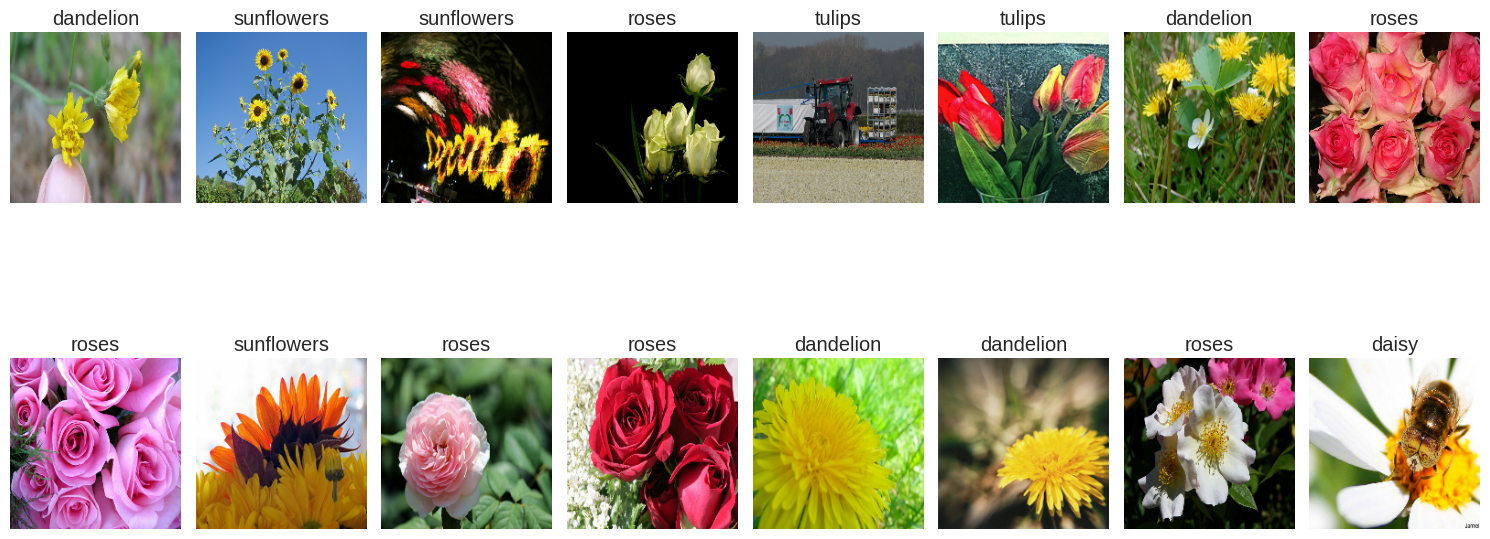

In [12]:
plt.figure(figsize=(15,8))

for images, labels in train_ds.take(1):
    for i in range (BATCH_SIZE):
        plt.subplot(int(BATCH_SIZE/8), 8, i +1)
        plt.grid(False)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')
    plt.tight_layout()
plt.show()

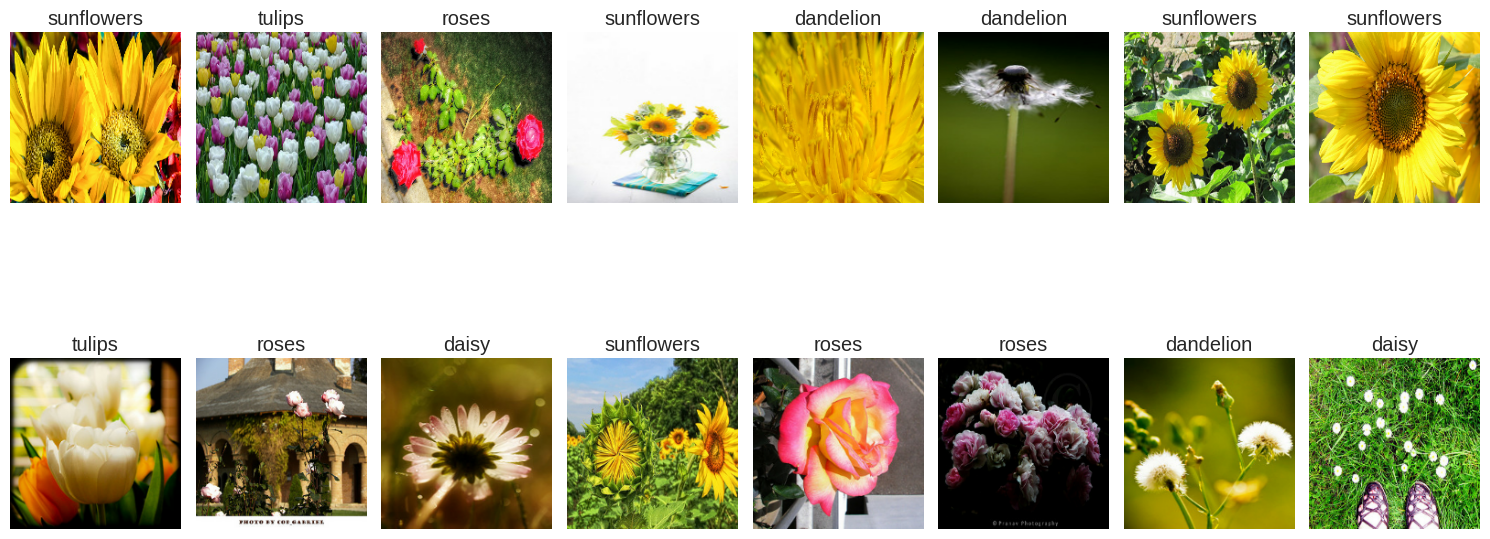

In [13]:
plt.figure(figsize=(15,8))

for images, labels in test_ds.take(1): # get me one batch

    for i in range (BATCH_SIZE): # loop over batch

        plt.subplot(int(BATCH_SIZE/8), 8, i +1) # access the axis

        plt.grid(False) # no to grid

        plt.imshow(images[i].numpy().astype('uint8')) # show image convert to numpy and int

        plt.title(class_names[labels[i]])

        plt.axis('off')

    plt.tight_layout()

plt.show()

## To check whether data is balanced or not

In [14]:
def fn_plot_label(tr_ds, ts_ds):

    plt.figure(figsize = (15,5)) # instantiate the figure

    plt.subplot(1,2,1) # first out of 2

    train_labels = tf.concat([lbl for img, lbl in tr_ds], axis = 0).numpy() # get the labels

    unique, _, counts = tf.unique_with_counts(train_labels) # get counts

    plt.bar(range(len(unique)), counts, align='center', color = 'DarkBlue') # barplot the counts

    plt.xticks(range(len(unique)), class_names)

    plt.title('Training Set')

    plt.subplot(1,2,2)

    test_labels = tf.concat([lbl for img, lbl in ts_ds], axis = 0).numpy()

    unique, _, counts = tf.unique_with_counts(test_labels)

    plt.bar(range(len(unique)), counts, align='center', color = 'Orange')

    plt.xticks(range(len(unique)), class_names)

    plt.title('Test Set')

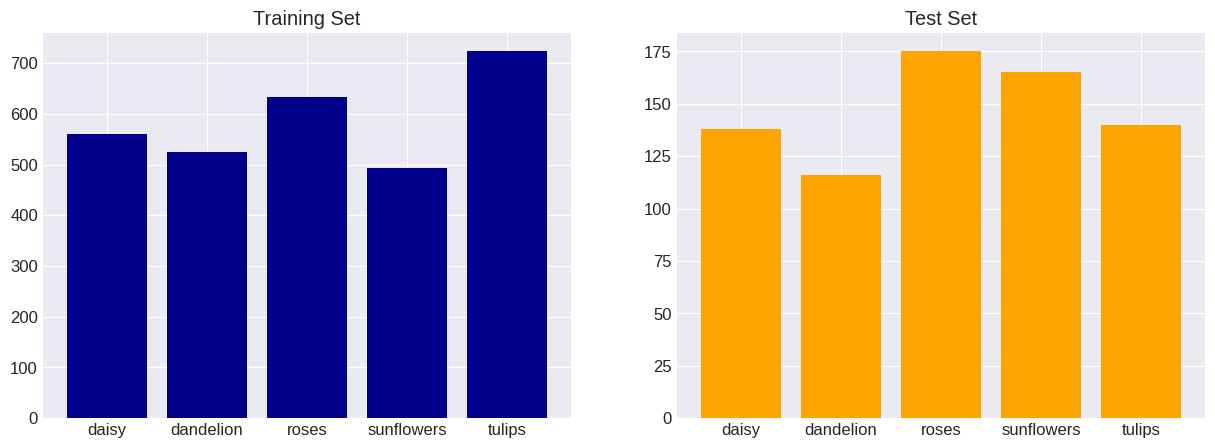

In [17]:
 fn_plot_label(train_ds, test_ds)

In [16]:
train_ds = train_ds.cache().prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size = tf.data.AUTOTUNE)

## Model Building

In [ ]:
input_shape = (IMG_HEIGHT, IMG_WIDTH, 3)
num_classes = len(class_names)
input_shape, num_classes

((187, 187, 3), 5)

In [ ]:
def build_model (input_shape, num_classes):

    krnl_initializer = tf.keras.initializers.GlorotUniform()

    model = tf.keras.Sequential()

    ## increasing dropout rate
    drop1 = 0.2
    drop2 = 0.2
    drop3 = 0.3
    drop4 = 0.3
    drop5 = 0.4
    drop6 = 0.4
    drop7 = 0.5
    drop8 = 0.5

    ## preprocessing (scaling)
    model.add(tf.keras.layers.Rescaling(1./255.))

    ## Augmentation

    model.add(tf.keras.layers.RandomZoom((0.2,0.2), fill_mode = 'nearest', seed=RANDOM_STATE))
    model.add(tf.keras.layers.RandomFlip('horizontal', seed=RANDOM_STATE))
    model.add(tf.keras.layers.RandomRotation(0.2, seed=RANDOM_STATE))
    model.add(tf.keras.layers.RandomTranslation(0.2, 0.2, fill_mode = 'nearest', seed=RANDOM_STATE))

    ## 1 layer
    model.add(tf.keras.layers.Conv2D(32,(5,5),
                                     strides=(2, 2),
                                     kernel_initializer = krnl_initializer,
                                     input_shape =input_shape)) ## output shape expected - 92*92*32

    model.add(tf.keras.layers.BatchNormalization())

    model.add(tf.keras.layers.LeakyReLU ())

    model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2))) ## 46*46*32

    model.add(tf.keras.layers.Dropout(drop1))

    ## 2 layer
    model.add(tf.keras.layers.Conv2D(64,3,
                                     kernel_initializer = krnl_initializer)) ## output shape expected - 44*44*64

    model.add(tf.keras.layers.BatchNormalization())

    model.add(tf.keras.layers.LeakyReLU ())

    model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2))) ## 22*22*256

    model.add(tf.keras.layers.Dropout(drop2))

    ## 3 layer
    model.add(tf.keras.layers.Conv2D(128,(3,3),
                                     kernel_initializer = krnl_initializer)) ## output shape expected - 20*20*512

    model.add(tf.keras.layers.BatchNormalization())

    model.add(tf.keras.layers.LeakyReLU ())

    model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2))) ## 10*10*128

    model.add(tf.keras.layers.Dropout(drop3))

    ## 4 layer
    model.add(tf.keras.layers.Conv2D(256,(3,3),
                                     kernel_initializer = krnl_initializer)) ## output shape expected - 8*8*256

    model.add(tf.keras.layers.BatchNormalization())

    model.add(tf.keras.layers.LeakyReLU ())

    model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2))) ## 4*4*256

    model.add(tf.keras.layers.Dropout(drop4))


    ## 5 layer
    model.add(tf.keras.layers.Conv2D(512,(3,3),
                                     kernel_initializer = krnl_initializer)) ## output shape expected - 2*2*512

    model.add(tf.keras.layers.BatchNormalization())

    model.add(tf.keras.layers.LeakyReLU ())

    model.add(tf.keras.layers.Dropout(drop5))


    ## Head
    model.add(tf.keras.layers.Flatten())

    model.add(tf.keras.layers.Dense(512, kernel_initializer = krnl_initializer))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU ())
    model.add(tf.keras.layers.Dropout(drop6))

    model.add(tf.keras.layers.Dense(128, kernel_initializer = krnl_initializer))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU ())
    model.add(tf.keras.layers.Dropout(drop7))

    model.add(tf.keras.layers.Dense(32, kernel_initializer = krnl_initializer))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU ())
    model.add(tf.keras.layers.Dropout(drop8))

    model.add(tf.keras.layers.Dense(num_classes))

    return model

In [ ]:
model = build_model(input_shape, num_classes)
model

In [ ]:
checkpoint_path = './weights_tf_flower'

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath = checkpoint_path,
    monitor='val_loss',
    verbose=2,
    save_best_only=True,
    save_weights_only=True,
    mode='auto',
    save_freq='epoch',
    initial_value_threshold=None
)

es_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=PATIENCE,
    verbose=2,
    mode='auto',
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=0
)

lr_callback = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=FACTOR_LR,
    patience=LR_PATIENCE,
    verbose=2,
    mode='auto',
    min_delta=0.00001,
    cooldown=0,
    min_lr=0.0,
)

## Compile and train

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=ALPHA)

model.compile(optimizer = optimizer,
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

In [ ]:
history = model.fit(train_ds,
                    validation_data = test_ds ,
                    batch_size = BATCH_SIZE,
                    epochs = EPOCHS, verbose=2,
                    callbacks=[model_checkpoint,es_callback,lr_callback])

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(



Epoch 1: val_loss improved from inf to 2.65323, saving model to ./weights_tf_flower
184/184 - 21s - loss: 1.6420 - accuracy: 0.3672 - val_loss: 2.6532 - val_accuracy: 0.2384 - lr: 0.0010 - 21s/epoch - 115ms/step
Epoch 2/200

Epoch 2: val_loss improved from 2.65323 to 1.50056, saving model to ./weights_tf_flower
184/184 - 4s - loss: 1.3480 - accuracy: 0.4670 - val_loss: 1.5006 - val_accuracy: 0.3106 - lr: 0.0010 - 4s/epoch - 19ms/step
Epoch 3/200

Epoch 3: val_loss improved from 1.50056 to 1.38182, saving model to ./weights_tf_flower
184/184 - 4s - loss: 1.2691 - accuracy: 0.4922 - val_loss: 1.3818 - val_accuracy: 0.4155 - lr: 0.0010 - 4s/epoch - 20ms/step
Epoch 4/200

Epoch 4: val_loss improved from 1.38182 to 1.10691, saving model to ./weights_tf_flower
184/184 - 4s - loss: 1.1807 - accuracy: 0.5276 - val_loss: 1.1069 - val_accuracy: 0.5668 - lr: 0.0010 - 4s/epoch - 20ms/step
Epoch 5/200

Epoch 5: val_loss did not improve from 1.10691
184/184 - 3s - loss: 1.1394 - accuracy: 0.5640 - 

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 187, 187, 3)       0         
                                                                 
 random_zoom (RandomZoom)    (None, 187, 187, 3)       0         
                                                                 
 random_flip (RandomFlip)    (None, 187, 187, 3)       0         
                                                                 
 random_rotation (RandomRot  (None, 187, 187, 3)       0         
 ation)                                                          
                                                                 
 random_translation (Random  (None, 187, 187, 3)       0         
 Translation)                                                    
                                                                 
 conv2d (Conv2D)             (None, 92, 92, 32)        2

In [ ]:
# tf.keras.utils.plot_model(model,'model.png', show_shapes=True, show_dtype=True, dpi=96, show_layer_activations=True)

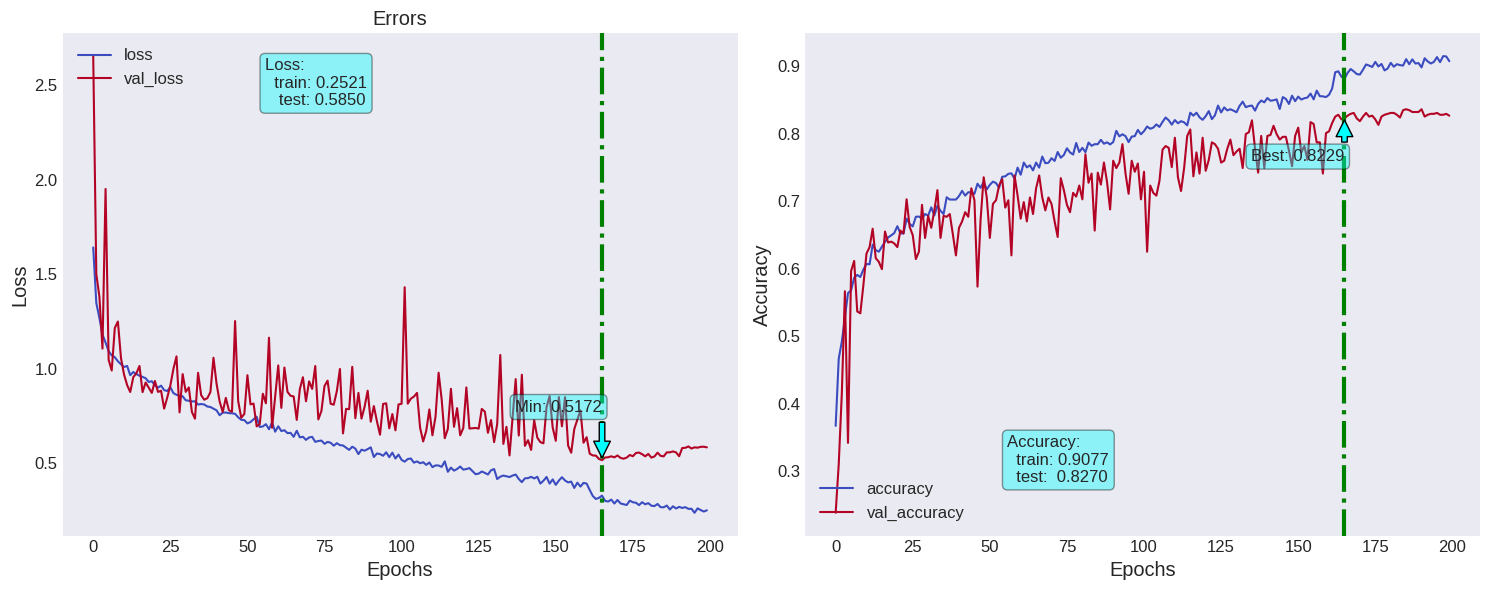

In [ ]:
history_df1 = pd.DataFrame(history.history)
fn_plot_tf_hist(history_df1)

In [ ]:
history1 = model.fit(train_ds,
                    validation_data = test_ds ,
                    batch_size = BATCH_SIZE,
                    epochs = EPOCHS, verbose=2,
                    callbacks=[model_checkpoint,es_callback,lr_callback])

history_df2 = pd.DataFrame(history1.history)

Epoch 1/200

Epoch 1: val_loss did not improve from 0.51724
184/184 - 5s - loss: 0.2773 - accuracy: 0.9009 - val_loss: 0.5816 - val_accuracy: 0.8297 - lr: 1.0000e-05 - 5s/epoch - 28ms/step
Epoch 2/200

Epoch 2: val_loss did not improve from 0.51724
184/184 - 3s - loss: 0.2590 - accuracy: 0.9145 - val_loss: 0.5918 - val_accuracy: 0.8270 - lr: 1.0000e-05 - 3s/epoch - 18ms/step
Epoch 3/200

Epoch 3: val_loss did not improve from 0.51724
184/184 - 3s - loss: 0.2617 - accuracy: 0.9040 - val_loss: 0.5861 - val_accuracy: 0.8270 - lr: 1.0000e-05 - 3s/epoch - 18ms/step
Epoch 4/200

Epoch 4: val_loss did not improve from 0.51724
184/184 - 4s - loss: 0.2420 - accuracy: 0.9101 - val_loss: 0.5850 - val_accuracy: 0.8270 - lr: 1.0000e-05 - 4s/epoch - 20ms/step
Epoch 5/200

Epoch 5: val_loss did not improve from 0.51724
184/184 - 4s - loss: 0.2623 - accuracy: 0.9046 - val_loss: 0.5831 - val_accuracy: 0.8283 - lr: 1.0000e-05 - 4s/epoch - 19ms/step
Epoch 6/200

Epoch 6: val_loss did not improve from 0.5

In [1]:
### No improvements after 200 Epoch

# Results

Validation accuracy acieved = 0.8365
